**Library and functions**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import normalize, StandardScaler
from plotly.subplots import make_subplots

def plotBoundary(X, y, method, costant, title ):

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    h = .02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = method.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title % (costant))
    plt.show()
    
def calculate_perc(X, y):
    sums_true = []
    sums_false = []
    X_set = set(X)
    
    for i in X_set:
        sum_true = 0
        sum_false = 0
        for j, label in zip(X, y):
            if i == j:
                if label is True:
                    sum_true = sum_true + 1
                else:
                    sum_false = sum_false + 1
        sums_true.append(sum_true)
        sums_false.append(sum_false)
    
    sums_tot = [i + j for i, j in zip(sums_false, sums_true)]
    perc_false = np.divide(sums_false, sums_tot) * 100
    perc_true = np.divide(sums_true, sums_tot) * 100
    
    return perc_true, perc_false
    
def plt_barChart(X, y, x_label, y_label, title):
    X_set = set(X)
    
    perc_true, perc_false = calculate_perc(X, y)
    
    y_pos = np.arange(len(set(X)))
    width = 0.3
    
    fig, ax = plt.subplots()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(y_pos, X_set)
    
    p1 = ax.bar(y_pos - width/2, perc_false*100, width, label='False %')
    p2 = ax.bar(y_pos + width/2, perc_true*100, width, label='True %')

    plt.legend(loc=2)
    plt.show()
    
def plt_pieChart(X, y, title):

    X_set = set(X)
    explode = [0.1 for i in range(len(X_set))]
        
    perc_true, perc_false = calculate_perc(X, y)
    
    pie = plt.pie(perc_false, labels=X_set, shadow=True, startangle=90, explode=explode, autopct='%1.1f%%')
    plt.legend(pie[0], X_set)
    plt.axis('equal')
    plt.title(title + 'revenue: FALSE')
    plt.show()
                            
    pie = plt.pie(perc_true, labels=X_set, startangle=90, shadow=True, explode=explode, autopct='%1.1f%%')
    plt.legend(pie[0], X_set)
    plt.axis('equal')
    plt.title(title + 'revenue: TRUE')
    plt.show()
    
def plt_boxPlot(X, X2, y, x_label, y_label, title):
    sns.boxplot(X, X2, hue=y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc=2)
    plt.show()

def dynamic_barChart(X, y, title, xlabel, ylabel):
    sums_true = []
    sums_false = []
    
    X_set = set(X)  
    x_set = [i for i in X_set]
    perc_true, perc_false = calculate_perc(X, y)
    
    fig = go.Figure(data=[
        go.Bar(name='True', x=x_set, y=perc_true),
        go.Bar(name='False', x=x_set, y=perc_false)
    ])
    fig.update_layout(
                        barmode='group',
                        title=title,
                        yaxis= dict(
                            title=ylabel,  
                        ),
                        xaxis=dict(
                            title=xlabel
                        ),
                     )
    fig.show()

def dynamic_pieChart(X, y, title):
    perc_true, perc_false = calculate_perc(X, y)
    X_set = set(X)  
    x_set = [i for i in X_set]
    # true pieChart
    fig = go.Figure(data=[
        go.Pie(labels=x_set,
              values=perc_true)
    ])
    fig.update_layout(
        title=title+'Revenue True'
    )
    fig.show()
    
    #false pieChart
    fig = go.Figure(data=[
        go.Pie(labels=x_set,
              values=perc_false)
    ])
    fig.update_layout(
        title=title + 'Revenue False'
    )
    fig.show()

def dynamic_boxPlot(X, X2, y):
    # da rivedere
    true_list = []
    false_list = []
    
    month_true = []
    month_false = []
    
    for label in (True, False):
        
        for x, x2, j in zip(X, X2, y):
            if label is j:
                true_list.append(x2)
                month_true.append(x)
            else:
                false_list.append(x2)
                month_false.append(x)
        
    fig = go.Figure()
    
    fig.add_trace(
        go.Box(
        y=true_list,
        x=month_true,
        name='True'
    ))
    
    fig.add_trace(
        go.Box(
        y=false_list,
        x=month_false,
        name='False'
    ))
    
    fig.update_layout(
        boxmode='group'
    )
    fig.show()
    
type_visitors = {
    'New_Visitor': 1,
    'Returning_Visitor': 2,
    'Other': 3
}

months = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

bol_value = {
    False: 0,
    True: 1
}

## **Explore the dataset**

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

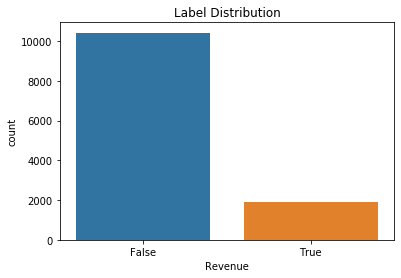

<bound method NDFrame.keys of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0            

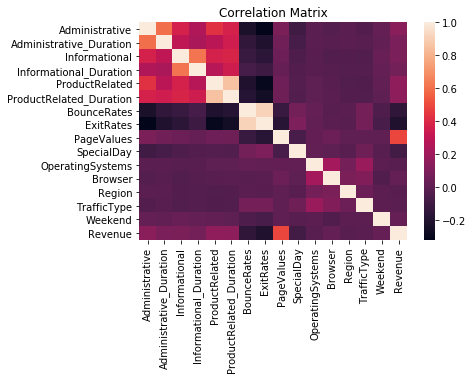

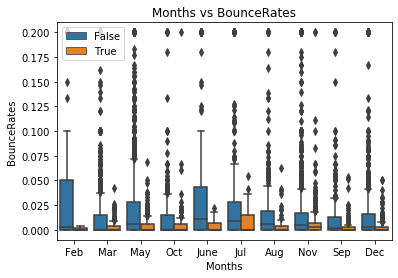

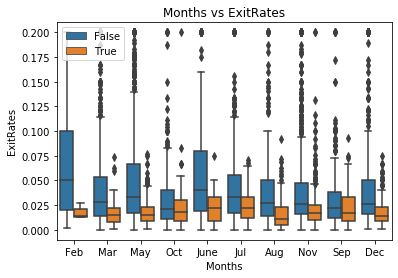

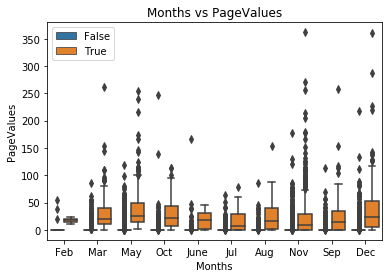

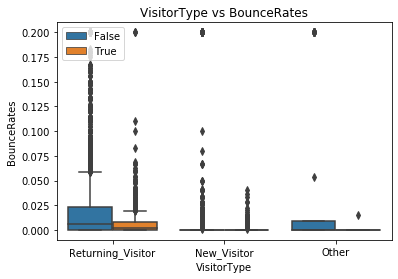

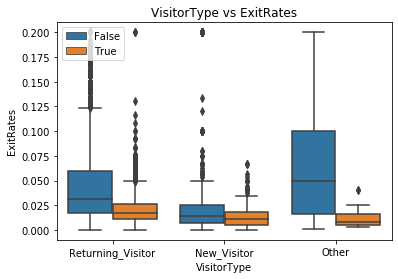

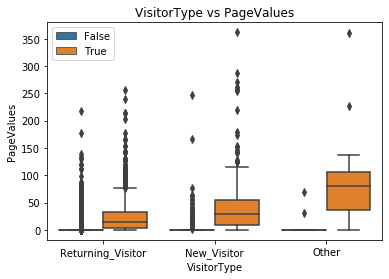

In [29]:
dataset = pd.read_csv('online_shoppers_intention.csv')
print(dataset.describe())

plt.title('Label Distribution')
sns.countplot(x='Revenue', data=dataset)
plt.show()
print(dataset.keys)

# correlation matrix
correlation_matrix = dataset.corr()
correlation_matrix.to_csv('correlation_matrix.csv')
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns.values,
            yticklabels=correlation_matrix.columns.values)
plt.show()

#barchart for revenue for visitor type
#plt_barChart(X=dataset['VisitorType'], y=dataset['Revenue'], x_label='Visitor Type', y_label='Revenue', 
#             title='Revenue for visitor type')
dynamic_barChart(dataset['VisitorType'], dataset['Revenue'], 'Revenue for visitor type', 
                 xlabel='VisitorType', ylabel='Revenue')

#barchart revenue for weekends
# plt_barChart(X=dataset['Weekend'], y=dataset['Revenue'], x_label='Weekend', y_label='Revenue', 
#             title='Revenue for weekend')
dynamic_barChart(dataset['Weekend'], dataset['Revenue'], title='Revenue for weekend', 
                 xlabel='Weekend', ylabel='Revenue')

#barchart revenue for regions
#plt_barChart(X=dataset['Region'], y=dataset['Revenue'], x_label='Region', y_label='Revenue', 
#             title='Revenue for regions')
dynamic_barChart(dataset['Region'], dataset['Revenue'], title='Revenue for regions', 
                 xlabel='Region', ylabel='Revenue')

#piechart revenue for OS
#plt_pieChart(X=dataset['OperatingSystems'], y=dataset['Revenue'], title='Pie chart for OS,')
dynamic_pieChart(X=dataset['OperatingSystems'], y=dataset['Revenue'], title='Pie chart for OS, ')

#piechart revenue for browser
#plt_pieChart(X=dataset['Browser'], y=dataset['Revenue'], title='Pie chart for browser, ')
dynamic_pieChart(X=dataset['Browser'], y=dataset['Revenue'], title='Pie chart for browser, ')

#piechart revenue for TrafficType
#plt_pieChart(X=dataset['TrafficType'], y=dataset['Revenue'], title='Pie chart for browser, ')
dynamic_pieChart(X=dataset['TrafficType'], y=dataset['Revenue'], title='Pie chart for browser, ')

#boxplot Months vs BounceRates
plt_boxPlot(X=dataset['Month'], y=dataset['Revenue'], X2=dataset['BounceRates'], x_label='Months', 
            y_label='BounceRates', title='Months vs BounceRates')
dynamic_boxPlot(X=dataset['Month'], X2=dataset['BounceRates'], y=dataset['Revenue'])

#boxplot Months vs ExitRates
plt_boxPlot(X=dataset['Month'], y=dataset['Revenue'], X2=dataset['ExitRates'], x_label='Months', y_label='ExitRates', 
            title='Months vs ExitRates')

#boxplot Months vs PageValues
plt_boxPlot(X=dataset['Month'], y=dataset['Revenue'], X2=dataset['PageValues'], x_label='Months', y_label='PageValues', 
            title='Months vs PageValues')

#boxplot VisitorType vs BounceRates
plt_boxPlot(X=dataset['VisitorType'], X2=dataset['BounceRates'], y=dataset['Revenue'], x_label='VisitorType', 
            y_label='BounceRates', title='VisitorType vs BounceRates')

#boxplot VisitorType vs ExitRates
plt_boxPlot(X=dataset['VisitorType'], X2=dataset['ExitRates'], y=dataset['Revenue'], x_label='VisitorType', 
            y_label='ExitRates', title='VisitorType vs ExitRates')

#boxplot VisitorType vs PageValues
plt_boxPlot(X=dataset['VisitorType'], X2=dataset['PageValues'], y=dataset['Revenue'], x_label='VisitorType', 
            y_label='PageValues', title='VisitorType vs PageValues')

**Preparing the dataset**

In [19]:
dataset['Month'] = dataset['Month'].replace(months)
dataset['Revenue'] = dataset['Revenue'].replace(bol_value)
dataset['VisitorType'] = dataset['VisitorType'].replace(type_visitors)
dataset['Weekend'] = dataset['Weekend'].replace(bol_value)

y = dataset['Revenue'].copy()
X = dataset.drop(['Revenue'], axis=1)
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test:', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (9864, 17)
y_train:  (9864,)
X_test: (2466, 17)
y_test:  (2466,)


**KNN**

In [13]:
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'p': [1, 2]     # for metrics Euclidean Distance, Minkowski
}
knn_model = KNeighborsClassifier()
clf_model = GridSearchCV(knn_model, parameters, cv=KFold(n_splits=10), scoring='f1').fit(X_train, y_train)
y_predict = clf_model.predict(X_test)
print(classification_report(y_test, y_predict))
print('Best score: ', clf_model.best_score_)
print('Best parameters: ', clf_model.best_params_)
#def plotBoundary(X, y, method, costant, title, final = False)


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2115
           1       0.60      0.41      0.48       351

    accuracy                           0.88      2466
   macro avg       0.75      0.68      0.71      2466
weighted avg       0.86      0.88      0.87      2466

Best score:  0.479838016960865
Best parameters:  {'n_neighbors': 3, 'p': 1}


**SVM**

In [14]:
parameters = {
    'C': [0.01, 1, 10, 100],
    'gamma': [1e-3, 0.01, 1e-6, 1e-9]
}
svc_model = SVC(kernel='rbf')
clf_model = GridSearchCV(svc_model, parameters, cv=KFold(n_splits=10), scoring='f1').fit(X_train, y_train)
y_predict = clf_model.predict(X_test)
print(classification_report(y_test, y_predict))
print('Best score: ', clf_model.best_score_)
print('Best parameters: ', clf_model.best_params_)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2115
           1       0.71      0.51      0.59       351

    accuracy                           0.90      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.89      0.90      0.89      2466

Best score:  0.5978434624229367
Best parameters:  {'C': 100, 'gamma': 0.01}


**RandomForestClassifier**

In [ ]:
parameters = {

}
rfc_model = RandomForestClassifier()
clf_model = GridSearchCV(rfc_model, parameters, cv=KFold(n_splits=10), verbose=10).fit(X_train, y_train)
y_predict = clf_model.predict(X_test)
print(classification_report(y_test, y_predict))
print('Best score: ', clf_model.best_score_)
print('Best parameters: ', clf_model.best_params_)